# Principal Component Analysis with Cancer Data

In [55]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [56]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df = pd.DataFrame(df)
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [57]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [58]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [59]:
df.shape

(699, 11)

In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [61]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [62]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [63]:
df['Bare Nuclei'].replace('?',1,inplace = True)


In [64]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [65]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [66]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values


TypeError: 'method' object is not subscriptable

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable
corr = df.corr()
plt.figure(figsize = (8,8))
corr_map = sns.heatmap(corr)

In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [ ]:
#Let us check for pair plots
sns.pairplot(df , diag_kind='kde')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [ ]:
df1 = df.drop(['ID','Class'],axis=1)
df1.head()

In [ ]:
df1.boxplot(figsize=(20,3))

In [ ]:
pd.crosstab(df['Class'],df['Mitoses'])

In [ ]:
pd.crosstab(df['Class'],df['Bland Chromatin'])

In [ ]:
pd.crosstab(df['Class'],df['Normal Nucleoli'])

In [ ]:
pd.crosstab(df['Class'],df['Single Epithelial Cell Size'])

In [ ]:
pd.crosstab(df['Class'],df['Marginal Adhesion'])

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
np.where((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

In [ ]:
df2 = df1.copy()
for i, j in zip(np.where(df2 < Q1 - 1.5 * IQR)[0], np.where(df2 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df2.iloc[i,j] = whisker[j]
for i, j in zip(np.where(df2 > Q3 + 1.5 * IQR)[0], np.where(df2 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df2.iloc[i,j] = whisker[j]
       

In [68]:
df1.shape

(699, 9)

In [69]:
df2.shape 
#Thus we get the same number of records even after treating the outliers

(699, 9)

# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [74]:
X = df2
y = df['Class']
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.50022749 0.55064449 0.5908535
  0.56225094 0.54666716 0.        ]
 [0.64583645 1.00143266 0.90818117 0.72048077 0.78565647 0.68765657
  0.75711145 0.72733735 0.        ]
 [0.65552689 0.90818117 1.00143266 0.69580609 0.75601336 0.70848734
  0.73744448 0.72318567 0.        ]
 [0.50022749 0.72048077 0.69580609 1.00143266 0.65744977 0.68022757
  0.68186453 0.62651495 0.        ]
 [0.55064449 0.78565647 0.75601336 0.65744977 1.00143266 0.62943312
  0.65715182 0.68576765 0.        ]
 [0.5908535  0.68765657 0.70848734 0.68022757 0.62943312 1.00143266
  0.6794109  0.5924866  0.        ]
 [0.56225094 0.75711145 0.73744448 0.68186453 0.65715182 0.6794109
  1.00143266 0.67343479 0.        ]
 [0.54666716 0.72733735 0.72318567 0.62651495 0.68576765 0.5924866
  0.67343479 1.00143266 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [76]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 3.08814898e-01  8.83763240e-01 -7.54136954e-05 -3.28031977e-03
   1.86250312e-01 -2.41903227e-01  1.69671035e-01 -3.98812990e-02
   0.00000000e+00]
 [ 3.87131918e-01 -2.85656412e-02 -7.37278498e-01 -1.95490183e-01
  -3.57058062e-01 -1.15336092e-01 -2.81069182e-01  2.18458528e-01
   0.00000000e+00]
 [ 3.84066759e-01  3.40173521e-02  6.61123996e-01 -1.63403829e-01
  -5.24362796e-01 -1.11953931e-02 -2.73988710e-01  1.93386408e-01
   0.00000000e+00]
 [ 3.43812543e-01 -3.63162623e-01  5.34558980e-02  4.21924797e-01
   1.01818589e-03 -6.19323481e-01  4.16053079e-01  1.11198030e-01
   0.00000000e+00]
 [ 3.54600719e-01 -1.80647945e-01  8.06236071e-02 -3.40539270e-01
   6.03683728e-01  2.35130516e-01  8.84760065e-02  5.40008410e-01
   0.00000000e+00]
 [ 3.43371537e-01  6.52716732e-02 -7.97036962e-02  6.34661688e-01
  -1.11541542e-01  6.63919757e-01  1.21963142e-01  2.41141323e-02
   0.00000000e+00]
 [ 3.55845857e-01 -1.45015364e-01  5.56912760e-02  1.58367758e-01
   4.14192

# Q8 Find variance and cumulative variance by each eigen vector

In [77]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.730456762665192, array([0.3088149 , 0.38713192, 0.38406676, 0.34381254, 0.35460072,
       0.34337154, 0.35584586, 0.34463886, 0.        ])), (0.537079095750368, array([ 0.88376324, -0.02856564,  0.03401735, -0.36316262, -0.18064794,
        0.06527167, -0.14501536, -0.16485976,  0.        ])), (0.4571099783226503, array([-0.00328032, -0.19549018, -0.16340383,  0.4219248 , -0.34053927,
        0.63466169,  0.15836776, -0.46174526,  0.        ])), (0.34333338078194753, array([-0.0398813 ,  0.21845853,  0.19338641,  0.11119803,  0.54000841,
        0.02411413, -0.50279734, -0.5965956 ,  0.        ])), (0.30859078993509714, array([ 0.16967103, -0.28106918, -0.27398871,  0.41605308,  0.08847601,
        0.12196314, -0.62224112,  0.48389551,  0.        ])), (0.2970247603276916, array([-0.24190323, -0.11533609, -0.01119539, -0.61932348,  0.23513052,
        0.66391976, -0.11233054,  0.18920769,  0.        ])), (0.24917042737539424, array([ 0.18625031, -0.35705806, -0.5243628 ,  0.0010181

In [79]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)
var_explained

[0.7152823355401122,
 0.06703884278143013,
 0.05705700373197608,
 0.04285527535511438,
 0.038518664408923105,
 0.03707497902516612,
 0.031101745047930143,
 0.011071154109347807,
 0.0]

In [80]:
cum_var_exp

array([0.71528234, 0.78232118, 0.83937818, 0.88223346, 0.92075212,
       0.9578271 , 0.98892885, 1.        , 1.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)

In [83]:
X

array([[-4.21706687e+00,  2.68819126e-01, -1.84272388e+00,
        -2.59556511e-01,  7.58327256e-01],
       [ 5.09533862e+00, -4.86346375e+00,  6.75854519e-01,
         9.43351903e-01, -2.64191466e-01],
       [-4.38099607e+00, -6.96861271e-01, -8.99769476e-03,
        -1.67537234e-01, -5.51373426e-02],
       ...,
       [ 9.85564069e+00,  6.94121007e+00,  2.27893499e+00,
         4.73063250e-01, -3.17204165e+00],
       [ 6.60177822e+00,  3.05597891e+00,  2.74805478e+00,
         1.98198343e-01, -4.90524592e-01],
       [ 7.74645042e+00,  2.07175872e+00,  2.85072898e+00,
         2.61989103e+00, -3.84219544e-01]])

# Q10 Find correlation between components and features

In [85]:
df_comp = pd.DataFrame(pca.components_,columns=list(df2))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.313663,0.420043,0.408308,0.311329,0.216025,0.463396,0.300574,0.331347,-0.0
1,0.066429,0.310969,0.246606,-0.070629,0.124714,-0.832823,0.043490,0.349347,0.0
2,-0.901233,0.070547,0.015026,0.339793,0.085843,0.031260,0.147831,0.192137,0.0
3,-0.097605,0.397026,0.361284,0.120912,0.038864,-0.103191,-0.032481,-0.821270,-0.0
4,0.273811,-0.193825,-0.321594,0.820521,-0.048791,-0.265844,0.151303,-0.121803,-0.0


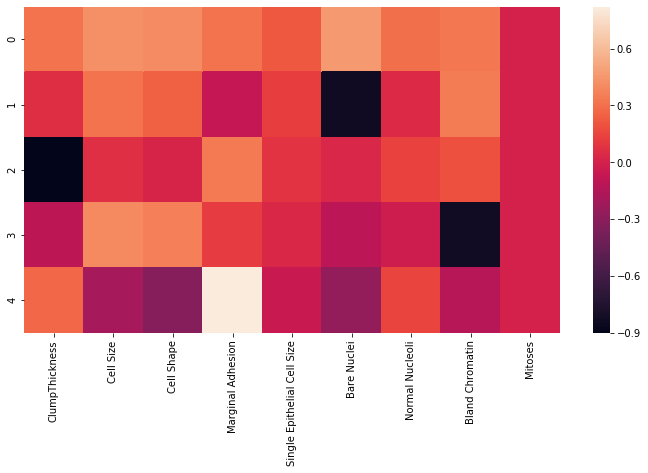

In [86]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [89]:
joy = pd.read_csv('jokes.csv')
joy = pd.DataFrame(joy)
joy.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [90]:
joy.shape

(24983, 101)

In [95]:
ratings = joy.iloc[0:201]


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [96]:
ratings.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [98]:
ratings1 = ratings.replace(99.00,0)

In [99]:
ratings1.drop(['NumJokes'],axis=1,inplace=True)


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [101]:
ratings_diff = ratings1.loc[:,:].mean()

In [105]:
ratings_diff.sort_values(ascending= False).head(10)

Joke50    4.070746
Joke36    3.630498
Joke53    3.553234
Joke35    3.246468
Joke29    3.205721
Joke27    3.079254
Joke49    2.875174
Joke62    2.801741
Joke32    2.766915
Joke31    2.643383
dtype: float64